In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

# 1. Data preparation

In [125]:
data_path = 'C:/Users/QianqianYu/OneDrive/ECstudy/Prediktiv_analys/prediktiv_analys_Eva/Assignment/prediktiv_data.csv'
df = pd.read_csv(data_path,index_col='id')
df.shape

(2930, 25)

In [126]:
df.head()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
id,,,,,,,,,,,,,,,,,,,,,
1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,5,...,2,good,bad,3,1,5,2010,0,0,1960
2,105000,1.0,730.0,0,882.0,896,5,896,5,6,...,0,NaN,bad,2,1,6,2010,0,0,1961
3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,6,...,0,NaN,good,3,1,6,2010,1,0,1958
4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,5,...,2,bad,amazing,3,1,4,2010,1,0,1968
5,189900,2.0,482.0,0,928.0,928,6,1629,5,5,...,1,bad,bad,3,1,3,2010,1,701,1998


## Handling missing values

<function matplotlib.pyplot.show(close=None, block=None)>

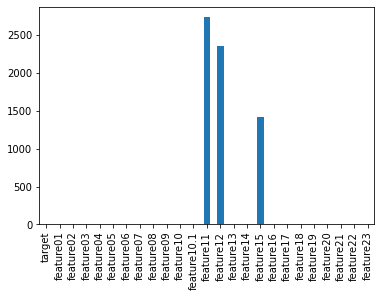

In [127]:
df.isna().sum().plot(kind = 'bar')
plt.show

In [128]:
#Deleting columns with majority of Nan
df.drop(['feature11','feature12','feature15'],axis=1,inplace=True)

In [129]:
df.isna().sum()

target         0
feature01      1
feature02      1
feature03      0
feature04      1
feature05      0
feature06      0
feature07      0
feature08      0
feature09      0
feature10      0
feature10.1    0
feature13      1
feature14      0
feature16      0
feature17      0
feature18      0
feature19      0
feature20      0
feature21      0
feature22      0
feature23      0
dtype: int64

In [130]:
#delete 3 rows that have Nan
df.dropna(axis=0,inplace=True)

## Create dummy variable for feature13,feature16

In [131]:
print(df['feature13'].unique())
print(df['feature16'].unique())

['red' 'blue' 'green' 'yellow' 'pink']
['bad' 'good' 'amazing' 'okay' 'horrible']


In [132]:
df = pd.concat([df, pd.get_dummies(df['feature13'], prefix='feature13', drop_first=True)],axis=1)
df = pd.concat([df, pd.get_dummies(df['feature16'], prefix='feature16', drop_first=True)],axis=1)
df.drop(['feature13','feature16'],axis=1,inplace=True)

In [133]:
df.describe()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature22,feature23,feature13_green,feature13_pink,feature13_red,feature13_yellow,feature16_bad,feature16_good,feature16_horrible,feature16_okay
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,...,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,180845.591732,1.766997,472.910489,2.245644,1051.908439,1159.860608,6.443799,1499.820635,6.096344,5.562692,...,335.278442,1984.265460,0.017082,0.000342,0.915955,0.002733,0.510079,0.395627,0.000342,0.023915
std,79903.174210,0.760682,215.086263,35.615352,440.578308,391.969015,1.573067,505.604600,1.410927,1.111711,...,428.412508,20.855349,0.129600,0.018484,0.277503,0.052217,0.499984,0.489068,0.018484,0.152811
min,12789.000000,0.000000,0.000000,0.000000,0.000000,334.000000,2.000000,334.000000,1.000000,1.000000,...,0.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129500.000000,1.000000,320.000000,0.000000,793.000000,876.500000,5.000000,1126.000000,5.000000,5.000000,...,0.000000,1965.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,160000.000000,2.000000,480.000000,0.000000,990.000000,1085.000000,6.000000,1442.000000,6.000000,5.000000,...,0.000000,1993.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,213500.000000,2.000000,576.000000,0.000000,1302.000000,1385.500000,7.000000,1742.500000,7.000000,6.000000,...,703.500000,2004.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,755000.000000,5.000000,1488.000000,800.000000,6110.000000,5095.000000,15.000000,5642.000000,10.000000,9.000000,...,2065.000000,2010.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
#we have now 28 columns instead of 25
df.columns

Index(['target', 'feature01', 'feature02', 'feature03', 'feature04',
       'feature05', 'feature06', 'feature07', 'feature08', 'feature09',
       'feature10', 'feature10.1', 'feature14', 'feature17', 'feature18',
       'feature19', 'feature20', 'feature21', 'feature22', 'feature23',
       'feature13_green', 'feature13_pink', 'feature13_red',
       'feature13_yellow', 'feature16_bad', 'feature16_good',
       'feature16_horrible', 'feature16_okay'],
      dtype='object')

<AxesSubplot:>

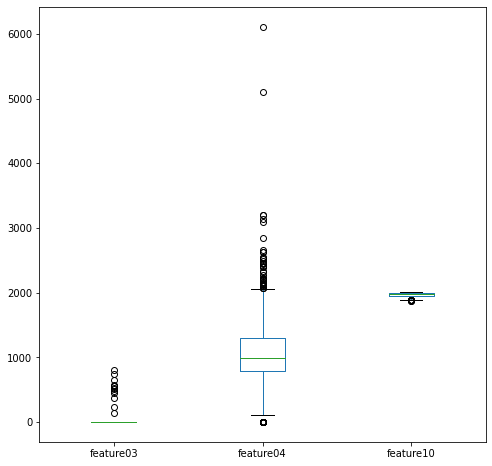

In [135]:
#Outliers, it seems a lot of outliers,but because feathers are kategorisk or årtal, so we handle them later
df[['feature03','feature04','feature10']].boxplot(grid=False,figsize=[8,8])

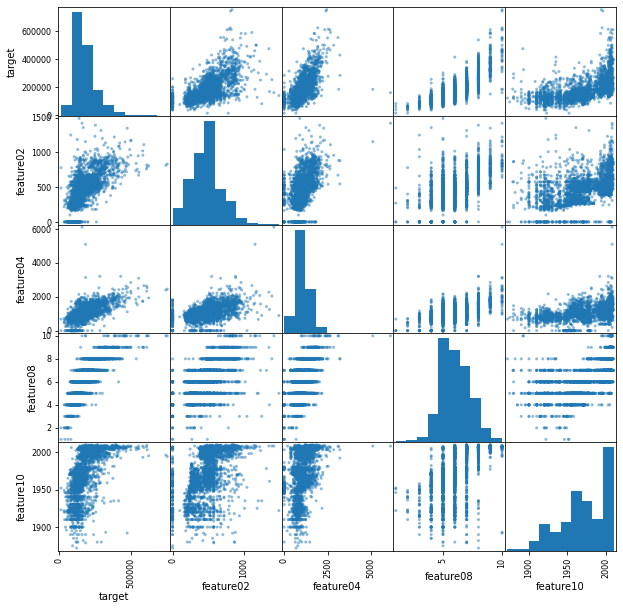

In [136]:
#Scatter several columns against each other which shows these feathers have relation with target
pd.plotting.scatter_matrix(df[['target','feature02','feature04','feature08','feature10']],figsize=[10,10]);

## Feature selecting

In [137]:
# All ways that I have tried to do with features selection cannot work for optimating model
# deleting dummy features with low variance not work(which makes mse to 0 and r2 to 1 in MLR)
# deleting features with majority '0' does not work
# deleting one of the features that highly related with each other does not work(feather04, 05)
# choosing top 15 correlated features does not work
# using RFE to choose most important features does not work
# Because som features are ordinal categorical number,so I prefer to use as much as possible data
# Finally I only use GridSearch to optimating parameters

# Making predictions with all the features


## Importing model, creating instans

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,explained_variance_score
from sklearn.preprocessing import RobustScaler

In [139]:
# Using all the features and scaling features
target_name = 'target'
X = df.drop(target_name, axis=1)
feature_names = X.columns
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y = df[target_name]
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

## Preparing a Dataframe for model analysis

In [140]:
models = pd.DataFrame(index=['rmse','mae','r2','evs'],
columns=['NULL','MLR','LASSO','RandomForest'])

## Training modeler with traindata

### A. The NULL model: always predict the average of the target

In [141]:
y_pred_null = y_train.mean()
models.loc['rmse','NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null,y_test.size),y_true=y_test,squared=False)
models.loc['mae','NULL'] = mean_absolute_error(y_pred=np.repeat(y_pred_null,y_test.size),y_true=y_test)
models.loc['r2','NULL'] = r2_score(y_pred=np.repeat(y_pred_null,y_test.size),y_true=y_test)
models.loc['evs','NULL'] = explained_variance_score(y_pred=np.repeat(y_pred_null,y_test.size),y_true=y_test)

### B. Multiple Linear Regression

In [142]:
# 1. Import the estimator object(model)
from sklearn.linear_model import LinearRegression
# 2. Create an instance of the estimator
linear_regression = LinearRegression()
# 3. Usr the training date to train the estimator
linear_regression.fit(x_train, y_train)
# 4. Evaluate the model
models.loc['rmse','MLR'] = mean_squared_error(y_pred=linear_regression.predict(x_test),y_true=y_test,squared=False)
models.loc['mae','MLR'] = mean_absolute_error(y_pred=linear_regression.predict(x_test),y_true=y_test)
models.loc['r2','MLR'] = r2_score(y_pred=linear_regression.predict(x_test),y_true=y_test)
models.loc['evs','MLR'] = explained_variance_score(y_pred=linear_regression.predict(x_test),y_true=y_test)

### C. Lasso

In [143]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1,max_iter=10000)
lasso.fit(x_train,y_train)
models.loc['rmse','LASSO'] = mean_squared_error(y_pred=lasso.predict(x_test),y_true=y_test,squared=False)
models.loc['mae','LASSO'] = mean_absolute_error(y_pred=lasso.predict(x_test),y_true=y_test)
models.loc['r2','LASSO'] = r2_score(y_pred=lasso.predict(x_test),y_true=y_test)
models.loc['evs','LASSO'] = explained_variance_score(y_pred=lasso.predict(x_test),y_true=y_test)

### D. Random Forest

In [144]:
from sklearn.ensemble import RandomForestRegressor
# Patameter grid and get'rf_regression.best_params_'{'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 20}
rf = RandomForestRegressor(n_estimators=20, max_depth=25,max_features='sqrt',random_state=55,n_jobs=-1)
rf.fit(x_train,y_train)
models.loc['rmse','RandomForest'] = mean_squared_error(y_pred=rf.predict(x_test),y_true=y_test,squared=False) 
models.loc['mae','RandomForest'] = mean_absolute_error(y_pred=rf.predict(x_test),y_true=y_test) 
models.loc['r2','RandomForest'] = r2_score(y_pred=rf.predict(x_test),y_true=y_test) 
models.loc['evs','RandomForest'] = explained_variance_score(y_pred=rf.predict(x_test),y_true=y_test) 

In [145]:
models

,NULL,MLR,LASSO,RandomForest
rmse,83015.643713,31864.227162,31865.982842,25652.089744
mae,60338.402611,20830.930199,20831.741548,17280.985715
r2,-0.002958,0.852236,0.852219,0.904235
evs,0.0,0.852748,0.852733,0.904568


# Evaluating models

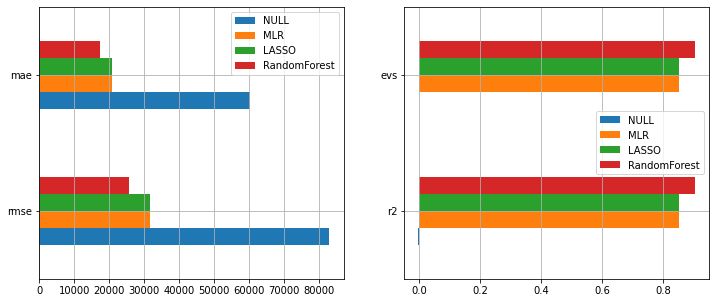

In [146]:
#Visualizing and choose the best RandomForest model with lowest error and higest r2
fig, ax = plt.subplots(1,2,figsize=(12,5))
models.iloc[[0,1]].plot(kind='barh',ax=ax[0])
models.iloc[[2,3]].plot(kind='barh',ax=ax[1])
ax[0].grid();
ax[1].grid();

# Predicting target

In [147]:
new_data_df = df.iloc[26].drop('target')
new_data_df

feature01                2.0
feature02              525.0
feature03                0.0
feature04              882.0
feature05              882.0
feature06                4.0
feature07              882.0
feature08                4.0
feature09                5.0
feature10             1970.0
feature10.1              1.0
feature14                0.0
feature17                2.0
feature18                1.0
feature19                4.0
feature20             2010.0
feature21                0.0
feature22                0.0
feature23             1970.0
feature13_green          0.0
feature13_pink           0.0
feature13_red            1.0
feature13_yellow         0.0
feature16_bad            1.0
feature16_good           0.0
feature16_horrible       0.0
feature16_okay           0.0
Name: 27, dtype: float64

In [148]:
new_data = OrderedDict([('feature01',3),('feature02',807),('feature03',0),('feature04',1333),('feature05',1326),
                        ('feature06',10),('feature07',1326),('feature08',5),('feature09',4),('feature10',1999),
                        ('feature10.1',1),('feature14',2),('feature17',2),('feature18',1),('feature19',5),
                        ('feature20',2008),('feature21',1),('feature22',0),('feature23',1970),('feature13_green',0),
                        ('feature13_pink',0),('feature13_red',1),('feature13_yellow',0),('feature16_bad',1),('feature16_good',0),
                        ('feature16_horrible',0),('feature16_okay',0)])
new_data = pd.Series(new_data).values.reshape(1,-1)


In [149]:
rf.predict(new_data)

array([275332.85])